- noise removal through fourir transform
- edge detection through mask
- discontinuity detection





In [21]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from skimage import io
from google.colab.patches import cv2_imshow # for image display
import skimage.io as sk
from PIL import Image 
from collections import Counter
import math

In [22]:
# img = io.imread('/content/abcl.jpg', as_gray = True)
# cv2_imshow(img)

## Prewitt’s Operator
- G<sub>x</sub> = 

|1|1|1|
|---|---|---|
|0|0|0|
|-1|-1|-1|

- G<sub>y</sub> = 

|1|0|-1|
|---|---|---|
|1|0|-1|
|1|0|-1|


In [23]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Open the image
img = np.array(Image.open('spiderman-forever.jpeg').convert('L')).astype(np.uint8)
gray_img = img
# # Apply gray scale
# gray_img = np.round(0.299 * img[:, :, 0] +
#                     0.587 * img[:, :, 1] +
#                     0.114 * img[:, :, 2]).astype(np.uint8)

# img = io.imread('spiderman-forever.jpeg', as_gray = True)


# Define filters for Prewitt Operator
vertical = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])  # s2
horizontal = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])  # s1

h, w = gray_img.shape

# define images with 0s
newgradientImage = np.zeros((h, w))
newHorizontalEdgesImage = np.zeros((h, w))
newVerticalEdgesImage = np.zeros((h, w))

# offset by 1
for i in range(1, h - 1):
    for j in range(1, w - 1):
        horizontalGrad = (horizontal[0, 0] * gray_img[i - 1, j - 1]) + \
                         (horizontal[0, 1] * gray_img[i - 1, j])     + \
                         (horizontal[0, 2] * gray_img[i - 1, j + 1]) + \
                         (horizontal[1, 0] * gray_img[i, j - 1])     + \
                         (horizontal[1, 1] * gray_img[i, j])         + \
                         (horizontal[1, 2] * gray_img[i, j + 1])     + \
                         (horizontal[2, 0] * gray_img[i + 1, j - 1]) + \
                         (horizontal[2, 1] * gray_img[i + 1, j])     + \
                         (horizontal[2, 2] * gray_img[i + 1, j + 1])

        verticalGrad = (vertical[0, 0] * gray_img[i - 1, j - 1])     + \
                       (vertical[0, 1] * gray_img[i - 1, j])         + \
                       (vertical[0, 2] * gray_img[i - 1, j + 1])     + \
                       (vertical[1, 0] * gray_img[i, j - 1])         + \
                       (vertical[1, 1] * gray_img[i, j])             + \
                       (vertical[1, 2] * gray_img[i, j + 1])         + \
                       (vertical[2, 0] * gray_img[i + 1, j - 1])     + \
                       (vertical[2, 1] * gray_img[i + 1, j])         + \
                       (vertical[2, 2] * gray_img[i + 1, j + 1])

        # Edge Magnitude
        mag = np.sqrt(pow(horizontalGrad, 2.0) + pow(verticalGrad, 2.0))
        newgradientImage[i - 1, j - 1] = mag
        newHorizontalEdgesImage[i - 1, j - 1] = horizontalGrad
        newVerticalEdgesImage[i - 1, j - 1]  = verticalGrad


# plt.figure()
# plt.title('spiderman-forever-prewitt.png')
# plt.imsave('spiderman-forever-prewitt.png', newgradientImage, cmap='gray', format='png')
# plt.imshow(newgradientImage, cmap='gray')



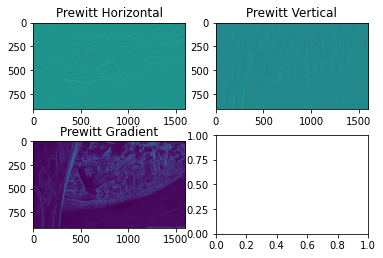

In [24]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(newHorizontalEdgesImage)
axs[0, 0].set_title('Prewitt Horizontal')
axs[0, 1].imshow(newVerticalEdgesImage)
axs[0, 1].set_title('Prewitt Vertical')
axs[1, 0].imshow(newgradientImage)
axs[1, 0].set_title('Prewitt Gradient')

plt.show()

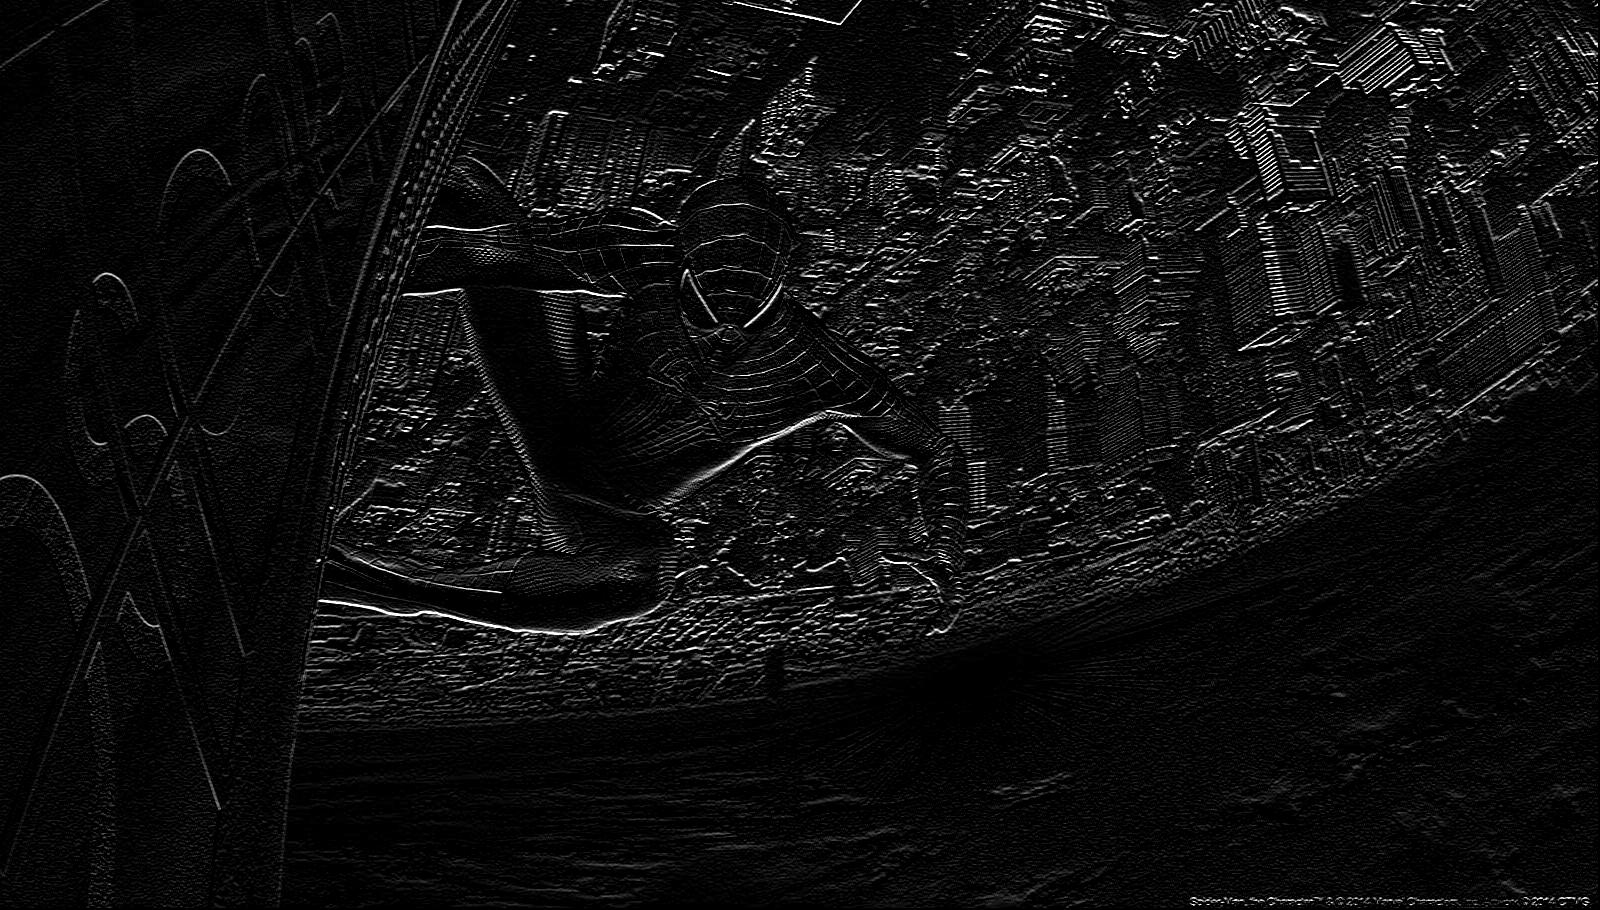

In [25]:
cv2_imshow(newHorizontalEdgesImage)

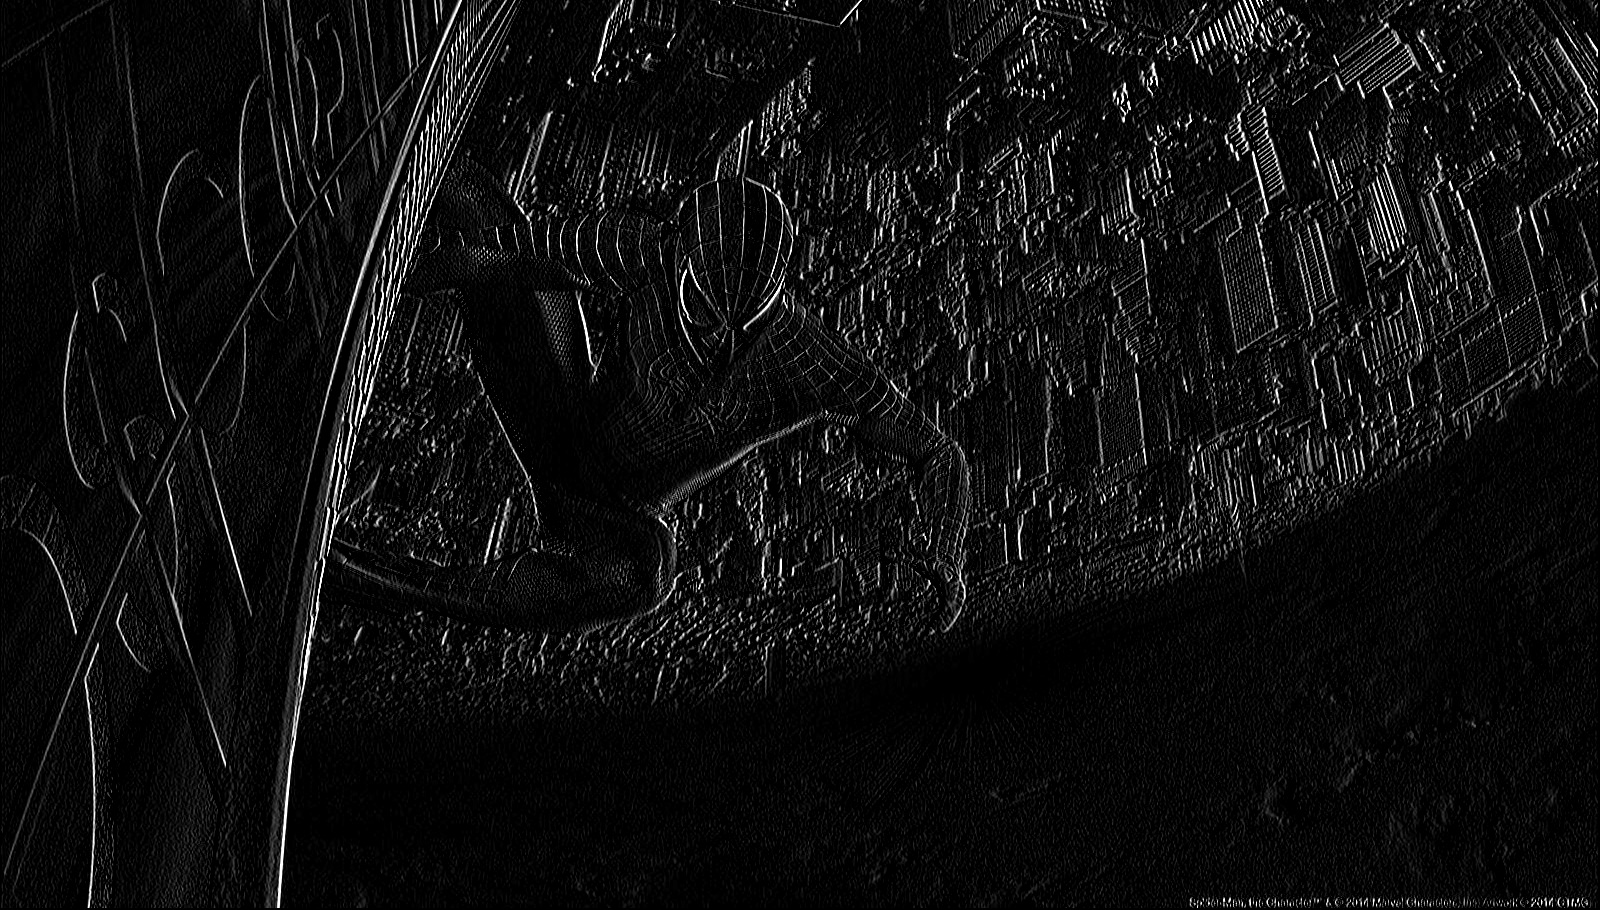

In [26]:
cv2_imshow(newVerticalEdgesImage)

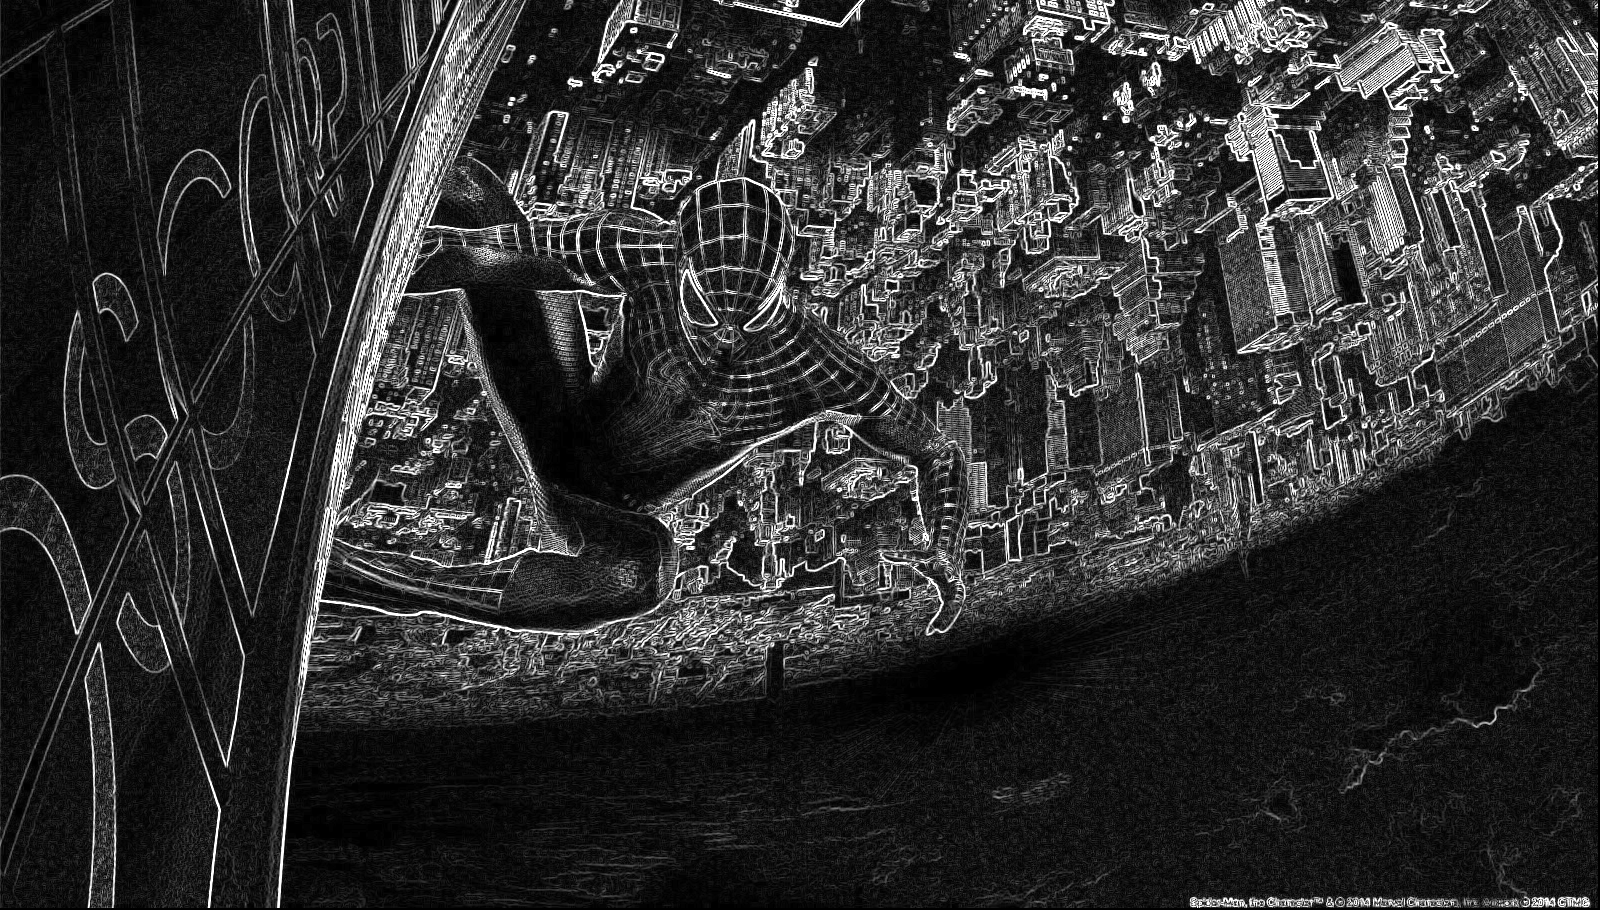

In [27]:
cv2_imshow(newgradientImage)